In [1]:
# understand data available

import pandas as pd



# Load physiological_cycles.csv
phys_cycles = pd.read_csv('../Data/physiological_cycles.csv', encoding='ascii')
print('physiological_cycles.csv head:')
print(phys_cycles.head())
print('\
')

# Load sleeps.csv
sleeps = pd.read_csv('../Data/sleeps.csv', encoding='ascii')
print('sleeps.csv head:')
print(sleeps.head())
print('\
')

# Load workouts.csv
workouts = pd.read_csv('../Data/workouts.csv', encoding='ascii')
print('workouts.csv head:')
print(workouts.head())
print('\
')

# Load journal_entries.csv
journal_entries = pd.read_csv('../Data/journal_entries.csv', encoding='ascii')
print('journal_entries.csv head:')
print(journal_entries.head())

physiological_cycles.csv head:
      Cycle start time       Cycle end time Cycle timezone  Recovery score %  \
0  2025-04-07 22:56:24                  NaN      UTC-05:00              79.0   
1  2025-04-06 21:43:12  2025-04-07 22:56:24      UTC-05:00              85.0   
2  2025-04-06 02:32:49  2025-04-06 21:43:12      UTC-05:00              20.0   
3  2025-04-05 03:20:42  2025-04-06 02:32:49      UTC-05:00              20.0   
4  2025-04-03 23:39:30  2025-04-05 03:20:42      UTC-05:00              53.0   

   Resting heart rate (bpm)  Heart rate variability (ms)  Skin temp (celsius)  \
0                      52.0                         80.0                34.20   
1                      51.0                         86.0                33.20   
2                      72.0                         36.0                33.85   
3                      71.0                         37.0                33.84   
4                      55.0                         70.0                33.90   

 

In [2]:
# Physiological cycles data
print("Physiological Cycles Data Info:")
print(phys_cycles.info())
print("\
Missing values in physiological_cycles.csv:")
print(phys_cycles.isnull().sum())
print("\
")

# Sleep data
print("Sleep Data Info:")
print(sleeps.info())
print("\
Missing values in sleeps.csv:")
print(sleeps.isnull().sum())
print("\
")

# Workout data
print("Workout Data Info:")
print(workouts.info())
print("\
Missing values in workouts.csv:")
print(workouts.isnull().sum())
print("\
")

# Journal entries data
print("Journal Entries Data Info:")
print(journal_entries.info())
print("\
Missing values in journal_entries.csv:")
print(journal_entries.isnull().sum())

Physiological Cycles Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             199 non-null    object 
 1   Cycle end time               198 non-null    object 
 2   Cycle timezone               199 non-null    object 
 3   Recovery score %             198 non-null    float64
 4   Resting heart rate (bpm)     198 non-null    float64
 5   Heart rate variability (ms)  198 non-null    float64
 6   Skin temp (celsius)          198 non-null    float64
 7   Blood oxygen %               191 non-null    float64
 8   Day Strain                   198 non-null    float64
 9   Energy burned (cal)          198 non-null    float64
 10  Max HR (bpm)                 198 non-null    float64
 11  Average HR (bpm)             198 non-null    float64
 12  Sleep onset                  198 non-null    o

In [3]:
# First, let's convert the date columns to datetime format for all datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.style.use('seaborn-v0_8-darkgrid')

# Function to convert columns to datetime
def convert_to_datetime(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

datetime_cols_phys = ['Cycle start time', 'Cycle end time', 'Sleep onset', 'Wake onset']
datetime_cols_sleep = ['Cycle start time', 'Cycle end time', 'Sleep onset', 'Wake onset']
datetime_cols_workout = ['Cycle start time', 'Cycle end time', 'Workout start time', 'Workout end time']
datetime_cols_journal = ['Cycle start time', 'Cycle end time']

phys_cycles = convert_to_datetime(phys_cycles, datetime_cols_phys)
sleeps = convert_to_datetime(sleeps, datetime_cols_sleep)
workouts = convert_to_datetime(workouts, datetime_cols_workout)
journal_entries = convert_to_datetime(journal_entries, datetime_cols_journal)

print("Date ranges for each dataset:")
print("\
Physiological Cycles:")
print(f"Start: {phys_cycles['Cycle start time'].min()}")
print(f"End: {phys_cycles['Cycle start time'].max()}")

print("\
Sleeps:")
print(f"Start: {sleeps['Cycle start time'].min()}")
print(f"End: {sleeps['Cycle start time'].max()}")

print("\
Workouts:")
print(f"Start: {workouts['Cycle start time'].min()}")
print(f"End: {workouts['Cycle start time'].max()}")

print("\
Journal Entries:")
print(f"Start: {journal_entries['Cycle start time'].min()}")
print(f"End: {journal_entries['Cycle start time'].max()}")

print("\
Number of records in each dataset:")
print(f"Physiological Cycles: {len(phys_cycles)}")
print(f"Sleeps: {len(sleeps)}")
print(f"Workouts: {len(workouts)}")
print(f"Journal Entries: {len(journal_entries)}")


Date ranges for each dataset:
Physiological Cycles:
Start: 2024-09-22 00:00:00
End: 2025-04-07 22:56:24
Sleeps:
Start: 2024-09-22 20:44:13
End: 2025-04-07 22:56:24
Workouts:
Start: 2024-09-22 20:44:13
End: 2025-04-06 21:43:12
Journal Entries:
Start: 2024-09-22 00:00:00
End: 2025-04-07 22:56:24
Number of records in each dataset:
Physiological Cycles: 199
Sleeps: 202
Workouts: 222
Journal Entries: 432


Merged DataFrame for Sleep Quality Prediction head:
  Cycle start time_sleep Cycle end time_sleep Cycle timezone_sleep  \
0    2025-04-07 22:56:24                  NaT            UTC-05:00   
1    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
2    2025-04-06 21:43:12  2025-04-07 22:56:24            UTC-05:00   
3    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   
4    2025-04-06 02:32:49  2025-04-06 21:43:12            UTC-05:00   

    Sleep onset_sleep    Wake onset_sleep  Sleep performance %_sleep  \
0 2025-04-07 22:56:24 2025-04-08 06:57:32                         87   
1 2025-04-06 21:43:12 2025-04-07 06:59:53                         89   
2 2025-04-06 21:43:12 2025-04-07 06:59:53                         89   
3 2025-04-06 02:32:49 2025-04-06 09:47:41                         67   
4 2025-04-06 02:32:49 2025-04-06 09:47:41                         67   

   Respiratory rate (rpm)_sleep  Asleep duration (min)_sleep  \
0                          16.

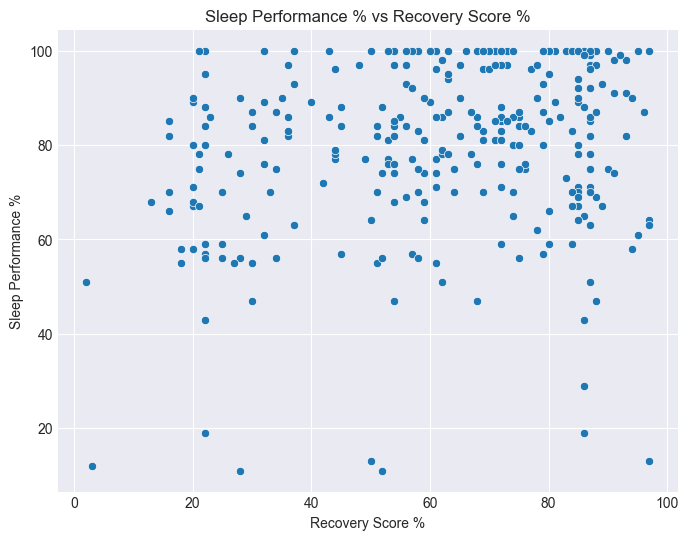

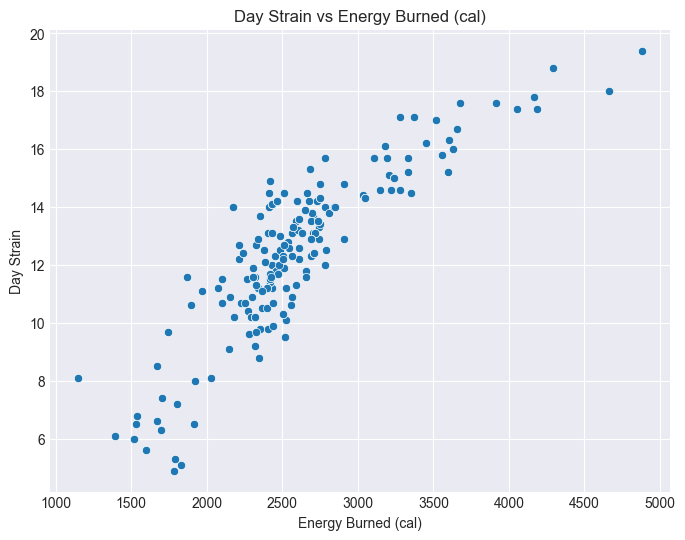

Data merging, cleaning, and initial EDA completed.


In [ ]:
# merge data

# Merging datasets based on date for Sleep Quality Prediction and Recovery Analysis

phys_cycles['date'] = phys_cycles['Cycle start time'].dt.date
sleeps['date'] = sleeps['Cycle start time'].dt.date
workouts['date'] = workouts['Cycle start time'].dt.date
journal_entries['date'] = journal_entries['Cycle start time'].dt.date

sleep_merged = pd.merge(sleeps, phys_cycles, on='date', suffixes=('_sleep', '_phys'))

recovery_merged = pd.merge(workouts, phys_cycles, on='date', suffixes=('_workout', '_phys'))

print('Merged DataFrame for Sleep Quality Prediction head:')
print(sleep_merged.head())

print('\
Merged DataFrame for Recovery and Activity Impact Analysis head:')
print(recovery_merged.head())

plt.figure(figsize=(8,6))
sns.scatterplot(data=sleep_merged, x='Recovery score %', y='Sleep performance %_sleep')
plt.title('Sleep Performance % vs Recovery Score %')
plt.xlabel('Recovery Score %')
plt.ylabel('Sleep Performance %')
plt.show()

# For Recovery Analysis, plot Energy burned (cal) vs Day Strain from the physiological cycles
plt.figure(figsize=(8,6))
sns.scatterplot(data=recovery_merged, x='Energy burned (cal)_phys', y='Day Strain')
plt.title('Day Strain vs Energy Burned (cal)')
plt.xlabel('Energy Burned (cal)')
plt.ylabel('Day Strain')
plt.show()